In [108]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image
from scipy import stats

Dynamic Walking Video
------------------------------------------

In [3]:
vidcap = cv2.VideoCapture('denis_walk.avi')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("frames/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

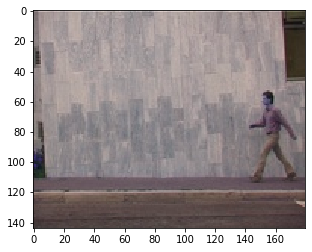

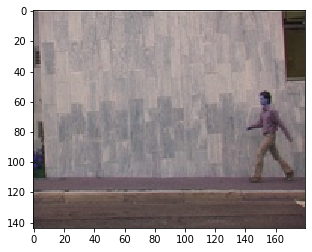

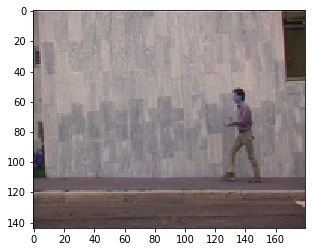

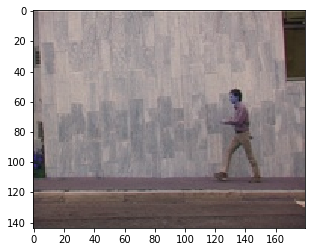

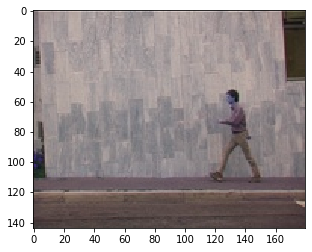

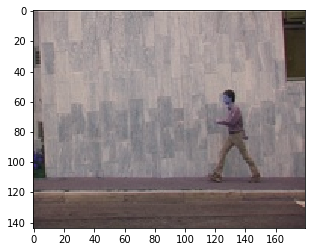

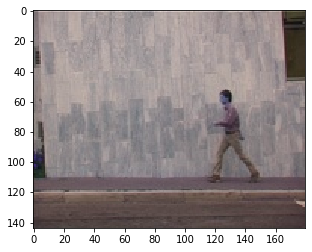

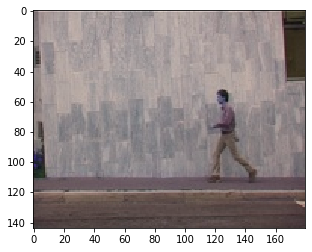

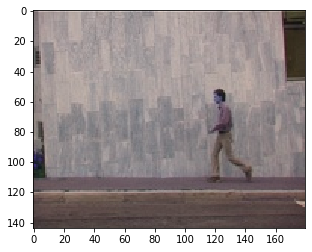

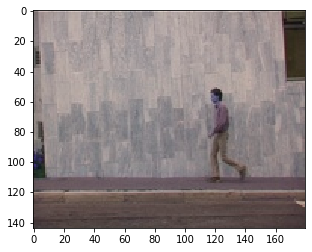

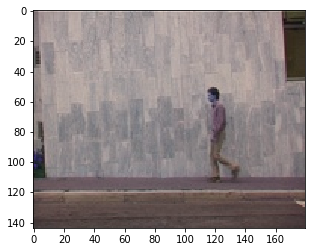

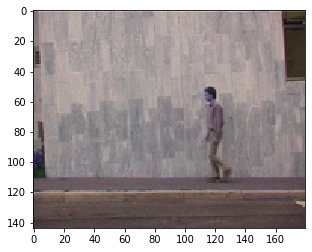

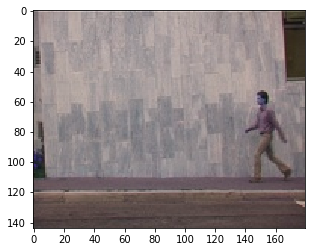

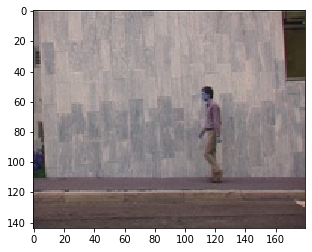

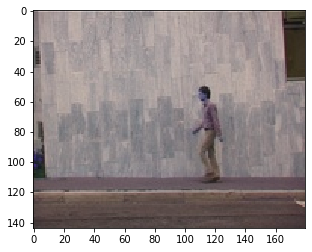

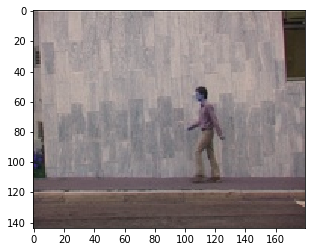

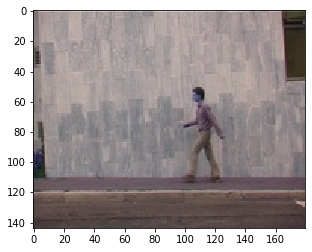

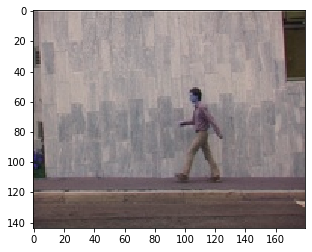

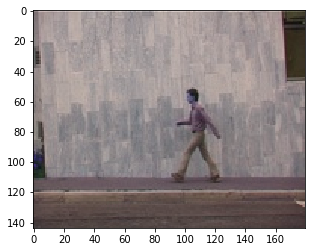

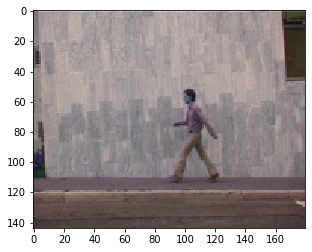

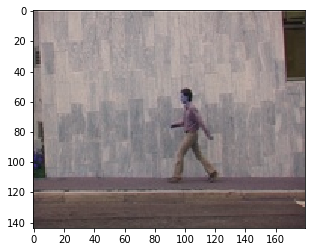

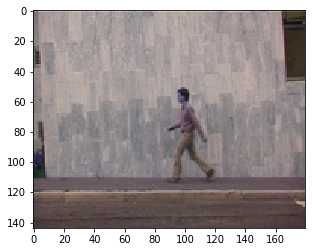

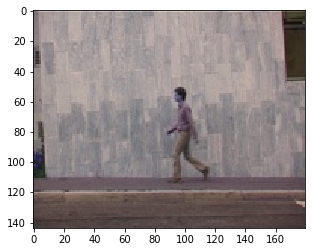

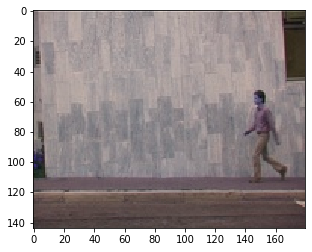

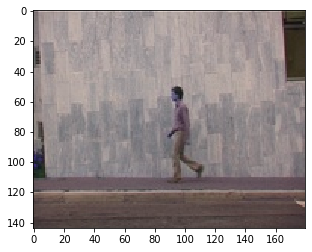

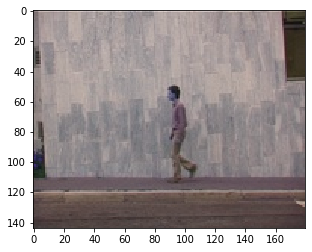

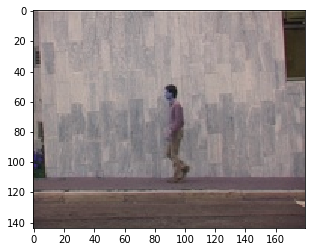

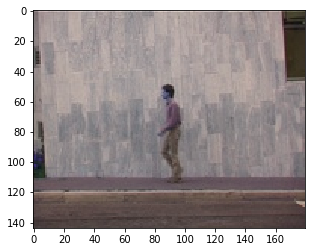

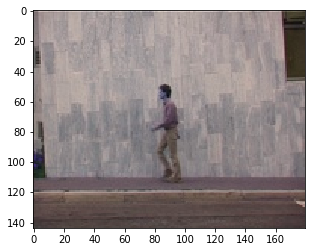

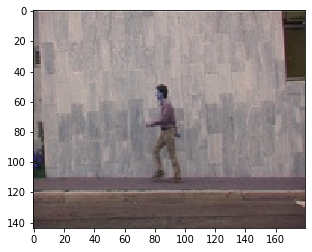

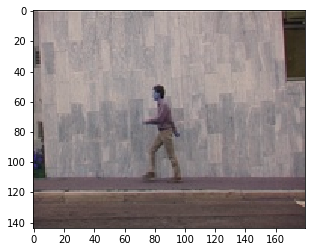

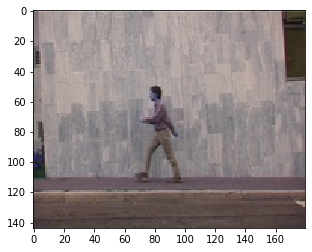

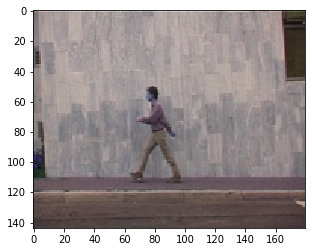

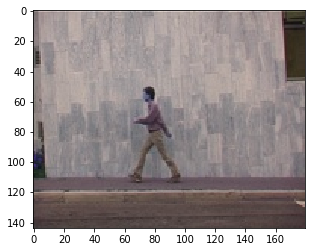

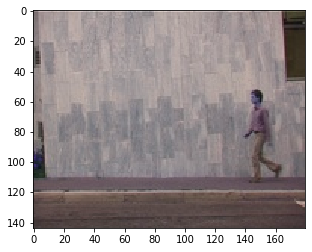

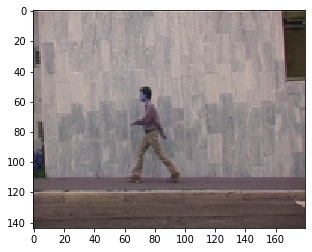

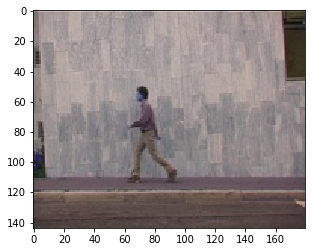

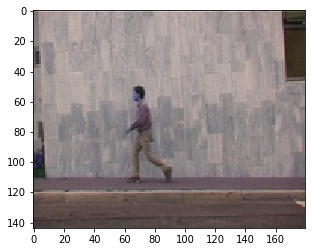

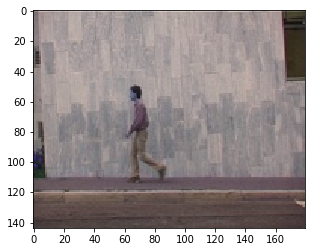

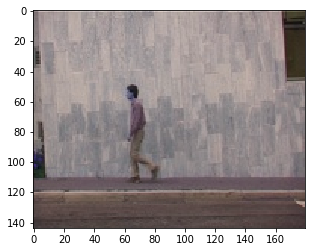

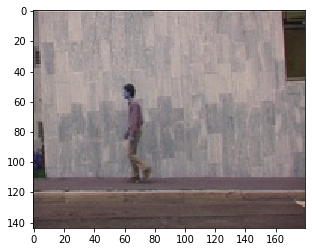

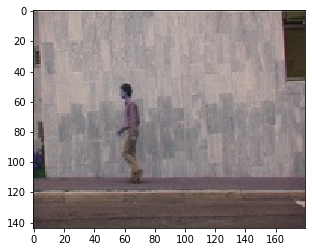

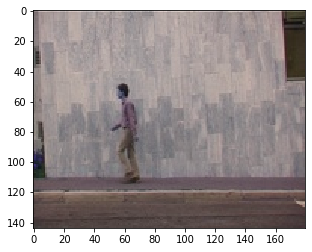

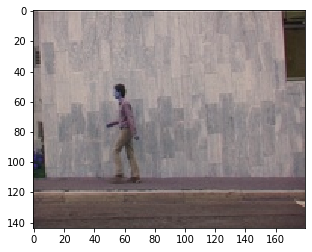

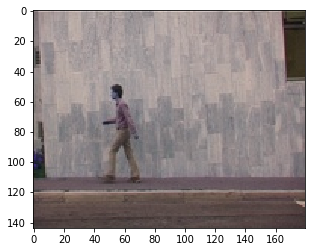

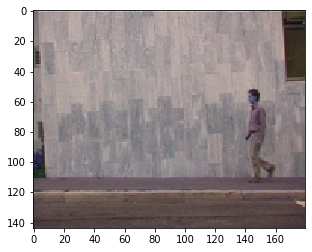

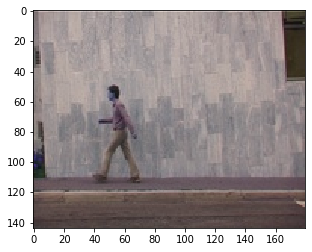

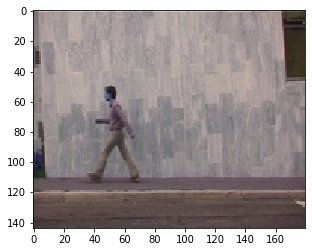

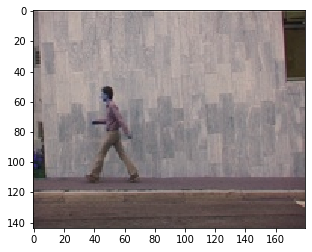

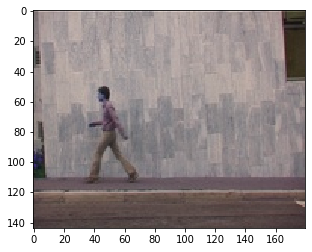

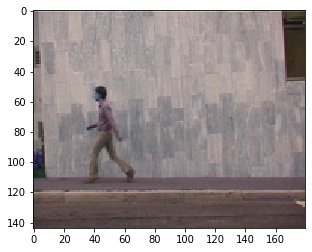

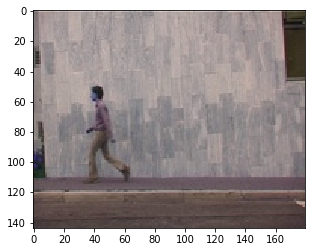

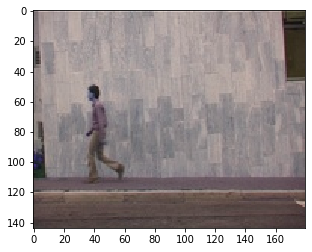

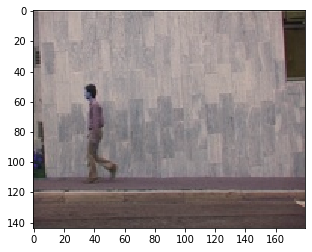

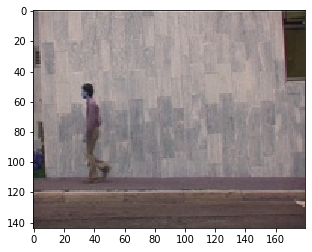

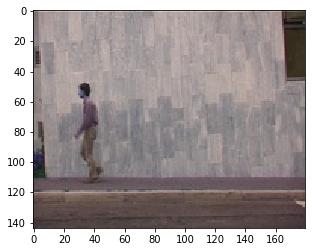

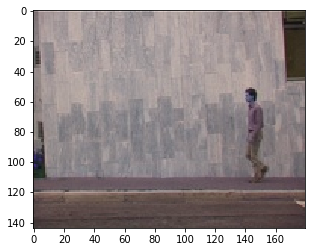

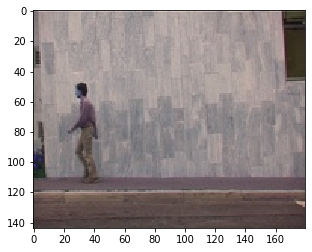

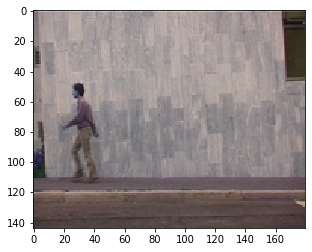

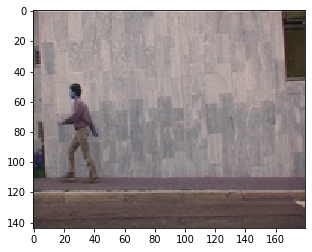

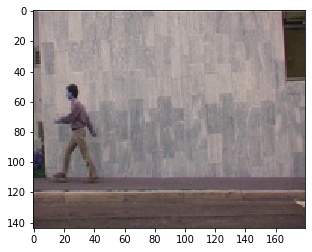

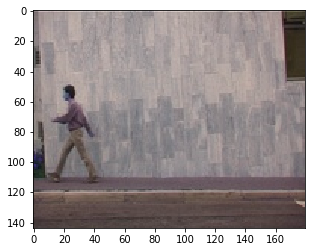

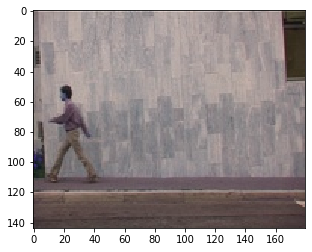

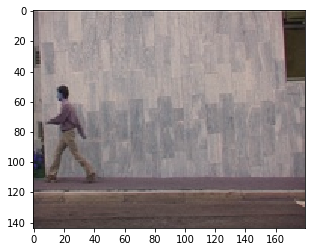

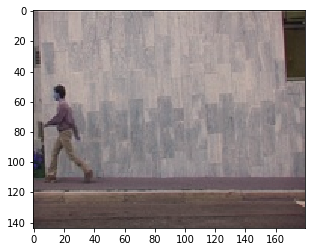

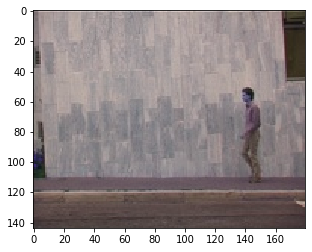

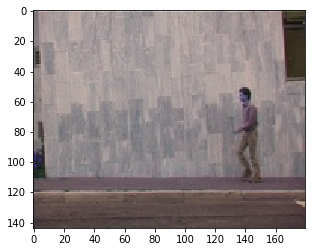

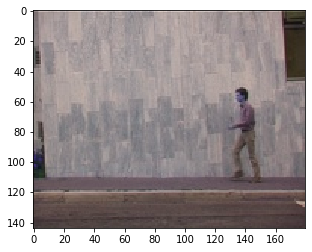

In [6]:
frames = []
for file in os.listdir("frames"):
    image = cv2.imread("frames/"+ file)
#     image.astype(float)
    frames.append(image)
    plt.imshow(image)
    plt.show()


In [109]:
def calculate_background(frames, method = "mean"):
    if(method == "mean"):
        mean = np.zeros(frames[0].shape)
        
        for frame in frames:
            mean = mean + frame

        mean = mean//len(frames)
        return mean
    elif(method == "median"):
        median = np.stack([f for f in frames])
        median = np.median(median, axis = 0)
        return median
    elif(method == "mode"):
        mode = np.stack([f for f in frames])
        mode = stats.mode(mode, axis = 0)
        mode = np.squeeze(mode[0])
        return mode
    else:
        raise Exception("Not a valid method")

In [110]:
mean = calculate_background(frames, "mean")
cv2.imwrite("bgsub/backgound/mean_background.jpg",mean)     # save frame as JPEG file      

median = calculate_background(frames, "median")
cv2.imwrite("bgsub/backgound/median_background.jpg",median)     # save frame as JPEG file   

mode = calculate_background(frames, "mode")
cv2.imwrite("bgsub/backgound/mode_background.jpg",mode)     # save frame as JPEG file   

True

In [115]:
def background_subtraction(frames, method = "mean"):
    
    if(method == "mean"):
        mean = calculate_background(frames, "mean")
        count = 0
        for frame in frames:
            curr = abs(frame - mean)
            curr[curr < 0 ] = -1
            curr[curr > 0] = 255
            
            cv2.imwrite("bgsub/mean/frame%d.jpg" % count, curr)
            count = count + 1
    elif(method == "median"):
        median = calculate_background(frames, "median")
        count = 0
        for frame in frames:
            curr = abs(frame - median)
            cv2.imwrite("bgsub/median/frame%d.jpg" % count, curr)
            count = count + 1
            
    elif(method == "mode"):
        mode = calculate_background(frames, "mode")
        count = 0
        for frame in frames:
            curr = abs(frame - mode)
            cv2.imwrite("bgsub/mode/frame%d.jpg" % count, curr)
            count = count + 1
    else:
        raise Exception("Not a valid method")
    

In [116]:
background_subtraction(frames, "mean")
background_subtraction(frames, "median")
background_subtraction(frames, "mode")

Static Video 
-----------------